# Predictive HR Analytics - Employee Attrition

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [3]:
market = pd.read_csv("MarketData.csv")

In [4]:
market.head()

,Role,Level,Role & Level,Experience Range (Years),Incumbent Average Compensation (USD),Incumbent Median Compensation (USD),Market Salary Range (USD),Market Median (USD),Compa Ratio
0,Healthcare Representative,2,Healthcare Representative 2,4–10,"$70,384","$68,856","65,000–85,000","$75,000",92%
1,Healthcare Representative,3,Healthcare Representative 3,9–15,"$112,367","$118,248","100,000–130,000","$115,000",103%
2,Healthcare Representative,4,Healthcare Representative 4,10–25,"$155,676","$162,036","140,000–180,000","$160,000",101%
3,Human Resources,1,Human Resources 1,0–6,"$32,799","$32,352","50,000–65,000","$55,000",59%
4,Human Resources,2,Human Resources 2,4–10,"$66,762","$71,820","60,000–80,000","$70,000",103%


In [5]:
df = pd.read_csv('EmployeeAttrition.csv')

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
df['JobRoleLevel'] = df['JobRole'] + ' ' + df['JobLevel'].astype(str)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,JobRoleLevel
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,Sales Executive 2
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,Research Scientist 2
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,Laboratory Technician 1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,Research Scientist 1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,Laboratory Technician 1


In [8]:
# Merge just the relevant column based on matching role-level
df = df.merge(
    market[['Role & Level', 'Market Median (USD)']],
    left_on='JobRoleLevel',
    right_on='Role & Level',
    how='left'
)


In [9]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,JobRoleLevel,Role & Level,Market Median (USD)
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,8,0,1,6,4,0,5,Sales Executive 2,Sales Executive 2,"$75,000"
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,3,3,10,7,1,7,Research Scientist 2,Research Scientist 2,"$65,000"
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,7,3,3,0,0,0,0,Laboratory Technician 1,Laboratory Technician 1,"$48,000"
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,3,3,8,7,3,0,Research Scientist 1,Research Scientist 1,"$52,000"
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,6,3,3,2,2,2,2,Laboratory Technician 1,Laboratory Technician 1,"$48,000"


# New Features

In [10]:
# Compa Ratio
df['Market Median (USD)'] = df['Market Median (USD)'].replace('[\$,]', '', regex=True).astype(float)
df['Compa Ratio'] = (df['MonthlyIncome'] * 12) / df['Market Median (USD)']
df[['MonthlyIncome', 'Market Median (USD)', 'Compa Ratio']].head()

,MonthlyIncome,Market Median (USD),Compa Ratio
0,5993,75000.0,0.958880
1,5130,65000.0,0.947077
2,2090,48000.0,0.522500
3,2909,52000.0,0.671308
4,3468,48000.0,0.867000


In [11]:
df['PromotionStagnation'] = df.apply(
    lambda x: x['YearsSinceLastPromotion'] / x['YearsAtCompany'] if x['YearsAtCompany'] != 0 else 0,
    axis=1
)


In [12]:
df['RoleTenureRatio'] = df.apply(
    lambda x: x['YearsInCurrentRole'] / x['YearsAtCompany'] if x['YearsAtCompany'] != 0 else 0,
    axis=1
)


In [13]:
df['JobHoppingIndex'] = df.apply(
    lambda x: x['NumCompaniesWorked'] / x['TotalWorkingYears'] if x['TotalWorkingYears'] != 0 else 0,
    axis=1
)


In [14]:
df['PromotionFlag'] = df.apply(
    lambda x: 'No Promotion' if x['YearsSinceLastPromotion'] == x['YearsAtCompany'] else 'Had Promotion',
    axis=1
)


In [15]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsSinceLastPromotion,YearsWithCurrManager,JobRoleLevel,Role & Level,Market Median (USD),Compa Ratio,PromotionStagnation,RoleTenureRatio,JobHoppingIndex,PromotionFlag
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,5,Sales Executive 2,Sales Executive 2,75000.0,0.958880,0.000,0.666667,1.000000,Had Promotion
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,7,Research Scientist 2,Research Scientist 2,65000.0,0.947077,0.100,0.700000,0.100000,Had Promotion
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,0,Laboratory Technician 1,Laboratory Technician 1,48000.0,0.522500,0.000,0.000000,0.857143,No Promotion
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,0,Research Scientist 1,Research Scientist 1,52000.0,0.671308,0.375,0.875000,0.125000,Had Promotion
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,2,2,Laboratory Technician 1,Laboratory Technician 1,48000.0,0.867000,1.000,1.000000,1.500000,No Promotion


In [16]:
# Drop clearly redundant or low-utility columns
columns_to_drop = [
    'EmployeeNumber',       # Unique identifier; not useful for modeling
    'EmployeeCount',        # Constant value (always 1); adds no predictive power
    'Over18',               # Constant ("Y" for all rows); provides no variation
    'StandardHours',        # Constant (80 for all); does not contribute to modeling
    'DailyRate',            # Synthetic value; shows no realistic correlation to actual MonthlyIncome or TotalWorkingYears
    'HourlyRate',           # Appears synthetic; no consistent relationship with compensation-related metrics
    'MonthlyRate',          # Budgeting placeholder; also not aligned with MonthlyIncome and likely synthetic
    'PerformanceRating',    # Very low variance (mostly 3s); not a strong predictor of attrition
    'Market Median (USD)',  # Used only to derive `Compa Ratio`; no longer needed after feature engineering
    'JobLevel',             # Strongly correlated with income and experience; its signal is now embedded within `JobRoleLevel`
    'Role & Level',         # Redundant after merging; same info captured in `JobRoleLevel`
]


In [17]:
# Drop the columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

# Show remaining columns for verification
df.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'JobRoleLevel',
 'Compa Ratio',
 'PromotionStagnation',
 'RoleTenureRatio',
 'JobHoppingIndex',
 'PromotionFlag']

In [18]:
# download as excel file to ensure the columns are correctly captured.

!pip install openpyxl
df.to_excel('final_output.xlsx', index=False)
from google.colab import files
files.download('final_output.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Exploratory Data Analysis (EDA)

Step 1: Data Structure Overview

In [19]:
# Shape of the dataset
print("Dataset Shape (rows, columns):", df.shape)

Dataset Shape (rows, columns): (1470, 32)


In [20]:
# List of all column names
print("\nColumn Names:")
print(df.columns.tolist())


Column Names:
['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobRoleLevel', 'Compa Ratio', 'PromotionStagnation', 'RoleTenureRatio', 'JobHoppingIndex', 'PromotionFlag']


In [21]:
# Stored data types
print("\nStored Data Types:")
print(df.dtypes)


Stored Data Types:
Age                           int64
Attrition                    object
BusinessTravel               object
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EnvironmentSatisfaction       int64
Gender                       object
JobInvolvement                int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
NumCompaniesWorked            int64
OverTime                     object
PercentSalaryHike             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany                int64
YearsInCurrentRole            int64
YearsSinceLastPromotion       int64
YearsWithCurrManager          int64
JobRoleLevel                 object
Compa Ra

In [22]:
# Summary of numerical columns
print("\nSummary of Numerical Columns:")
print(df.describe())



Summary of Numerical Columns:
               Age  DistanceFromHome    Education  EnvironmentSatisfaction  \
count  1470.000000       1470.000000  1470.000000              1470.000000   
mean     36.923810          9.192517     2.912925                 2.721769   
std       9.135373          8.106864     1.024165                 1.093082   
min      18.000000          1.000000     1.000000                 1.000000   
25%      30.000000          2.000000     2.000000                 2.000000   
50%      36.000000          7.000000     3.000000                 3.000000   
75%      43.000000         14.000000     4.000000                 4.000000   
max      60.000000         29.000000     5.000000                 4.000000   

       JobInvolvement  JobSatisfaction  MonthlyIncome  NumCompaniesWorked  \
count     1470.000000      1470.000000    1470.000000         1470.000000   
mean         2.729932         2.728571    6502.931293            2.693197   
std          0.711561         1.102

In [26]:
# Identify numerical features (excluding the target)
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

Histograms for numeric variables

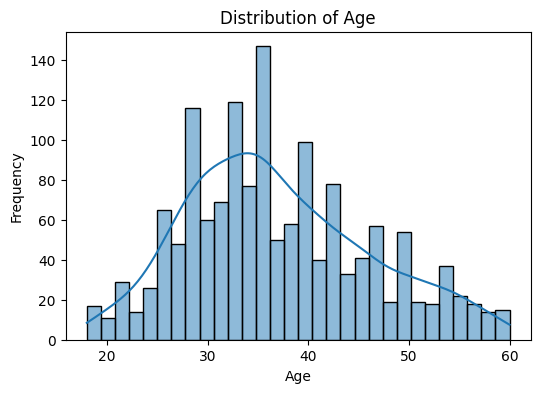

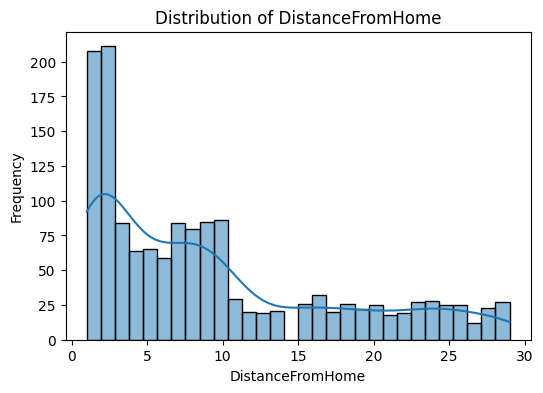

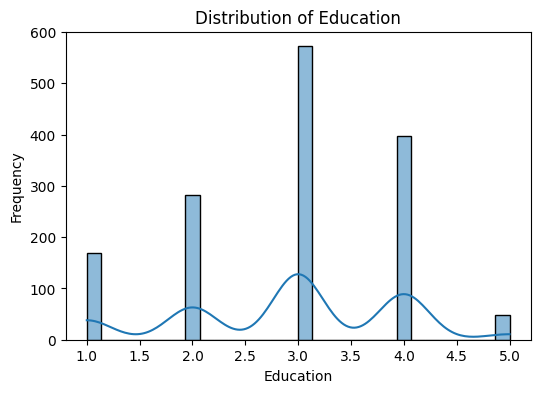

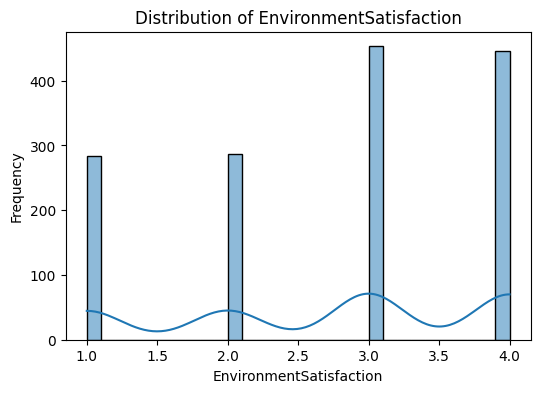

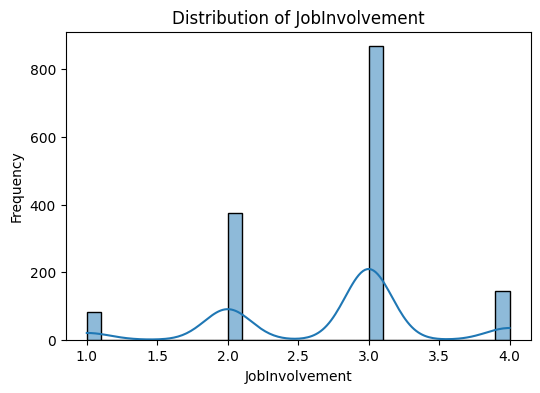

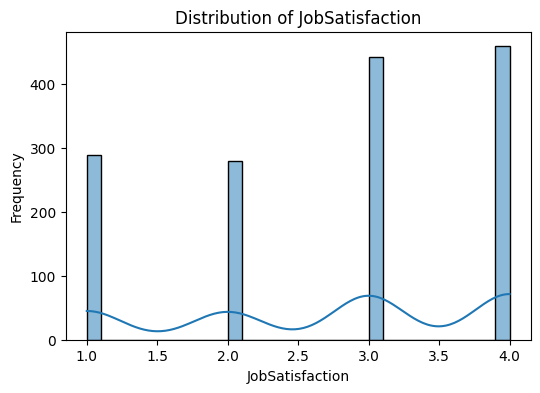

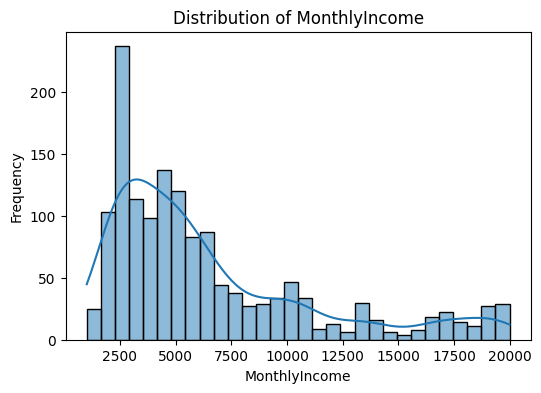

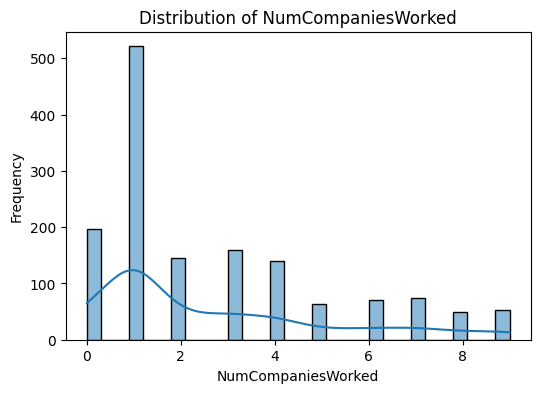

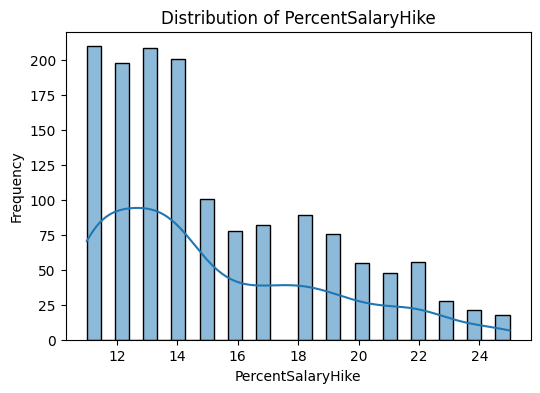

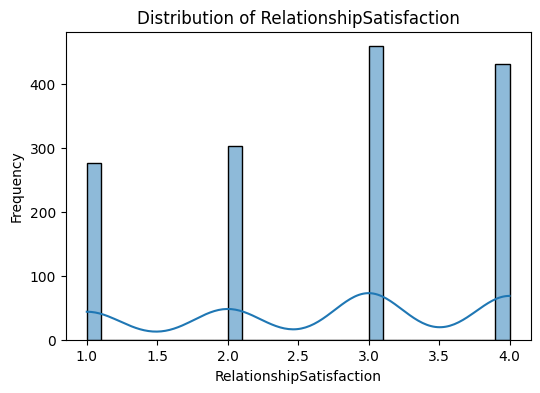

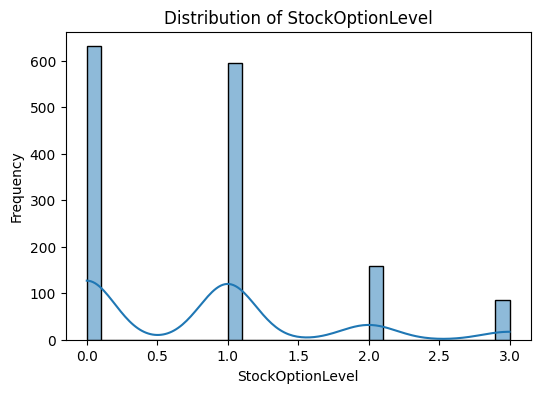

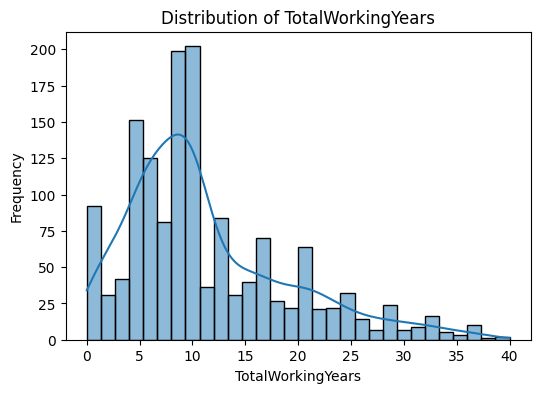

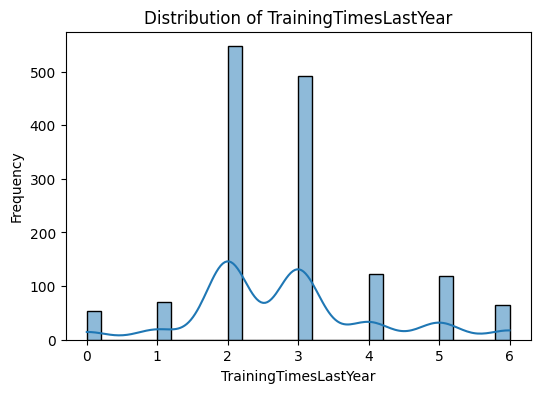

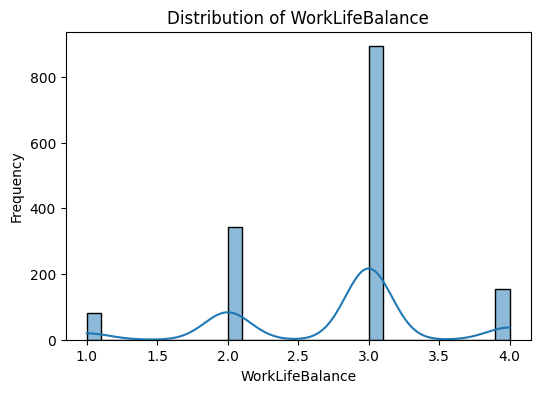

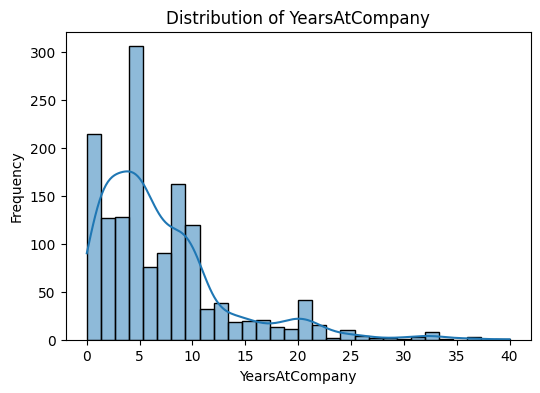

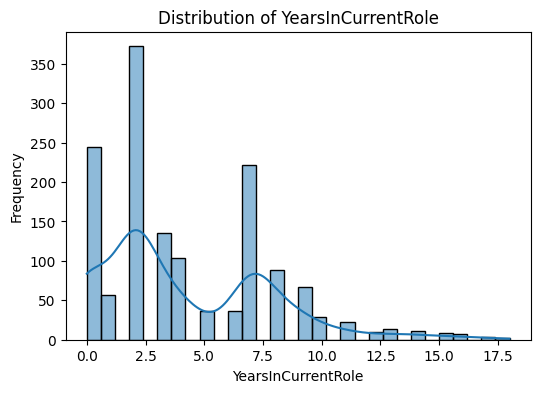

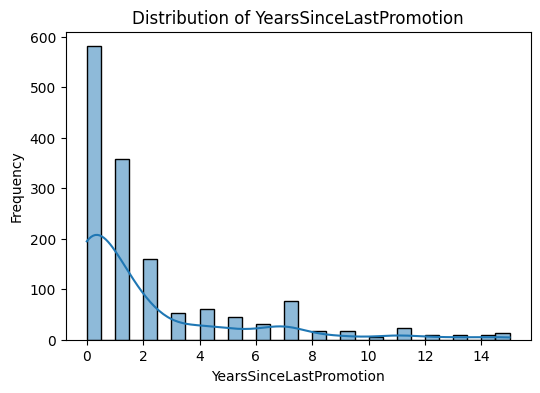

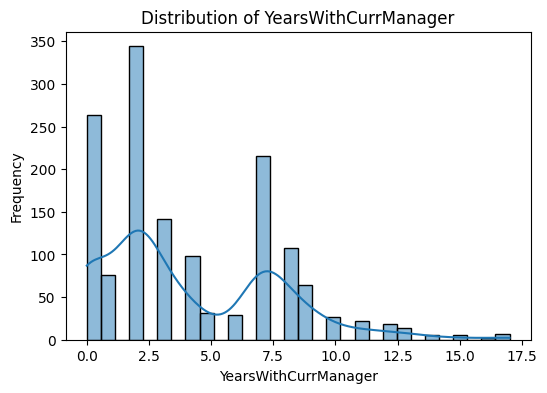

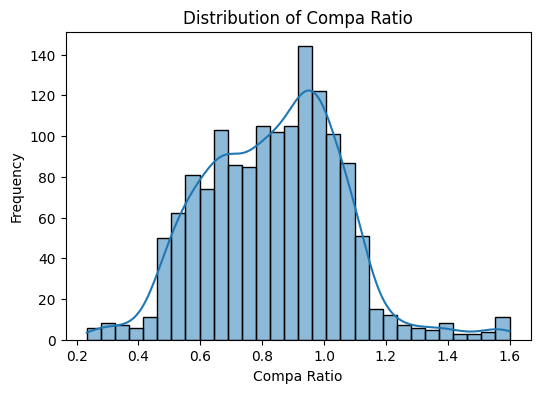

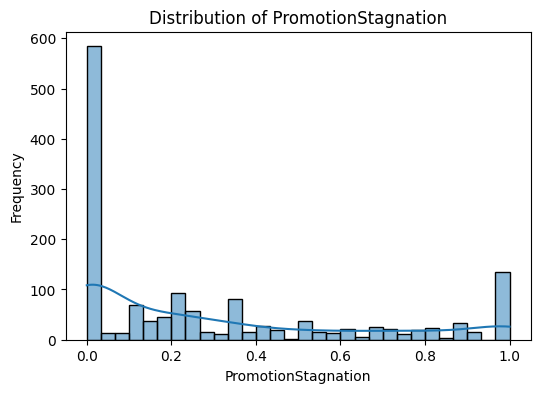

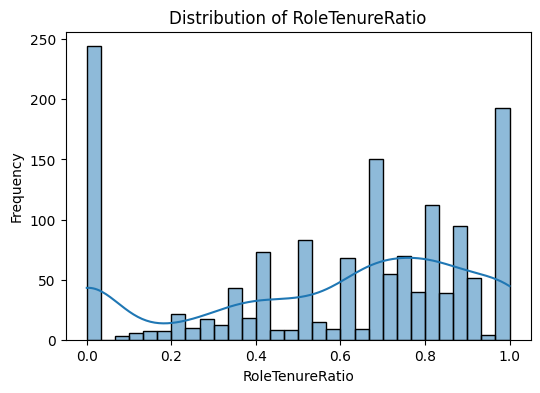

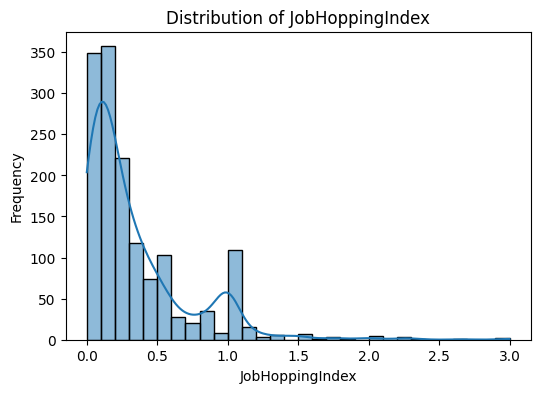

In [27]:
# Plot histograms
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [23]:
# Summary of object/categorical columns
print("\nSummary of Categorical Columns:")
print(df.describe(include='object'))


Summary of Categorical Columns:
       Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole MaritalStatus OverTime          JobRoleLevel  \
count              1470          1470     1470                  1470   
unique                9             3        2                    26   
top     Sales Executive       Married       No  Research Scientist 1   
freq                326           673     1054                   234   

        PromotionFlag  
count            1470  
unique              2  
top     Had Promotion  
freq             1291  


Count plots for categorical variables

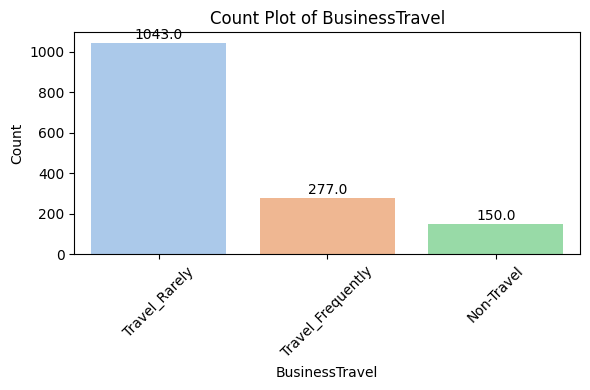

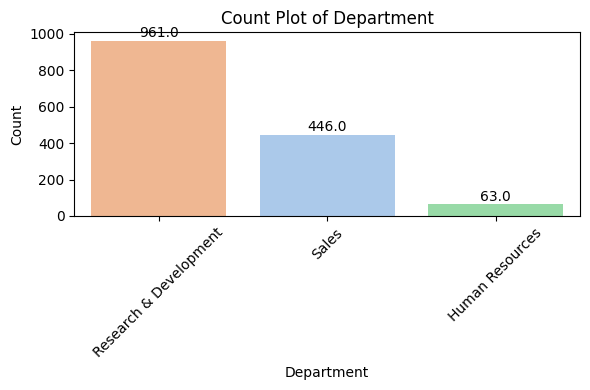

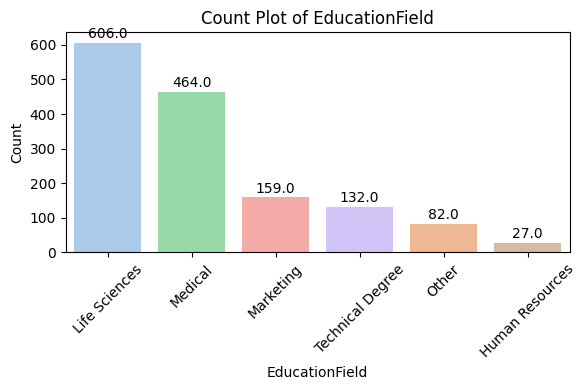

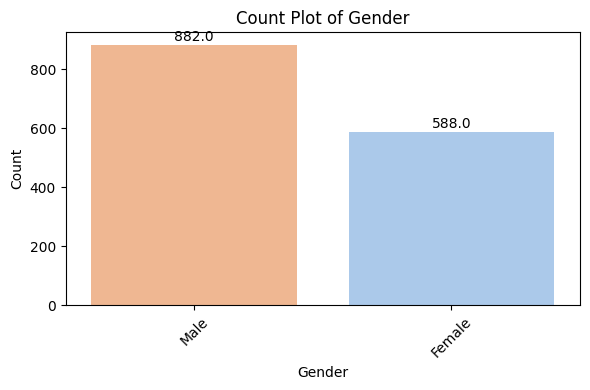

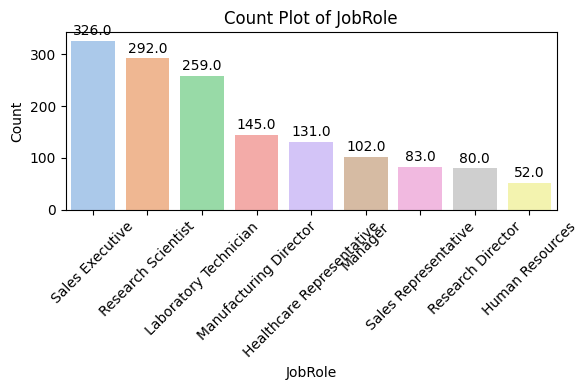

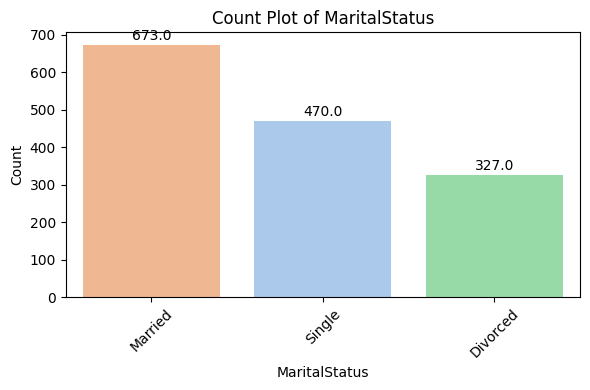

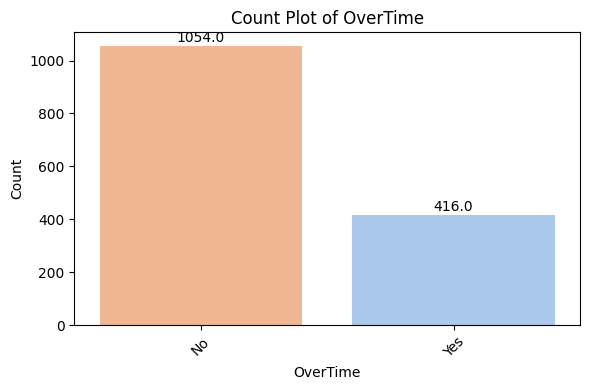

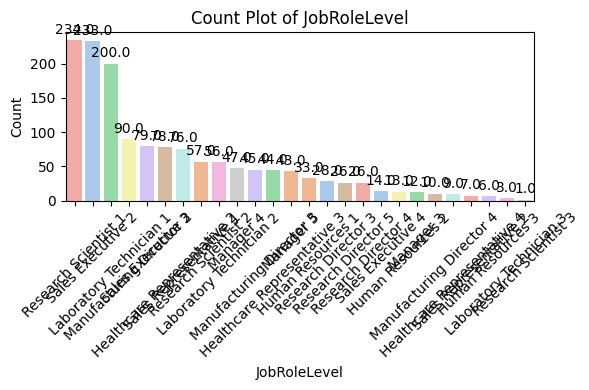

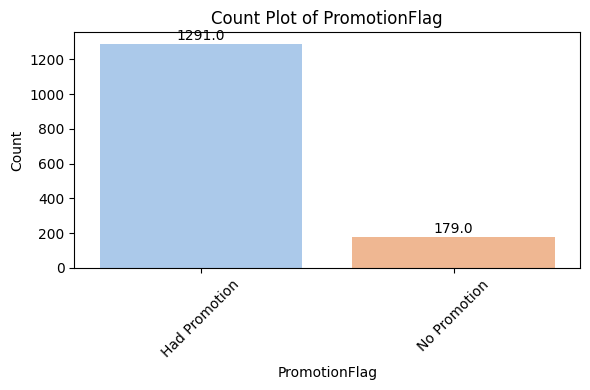

In [41]:
# Drop Attrition from the list of categorical variables
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'Attrition' in categorical_cols:
    categorical_cols.remove('Attrition')

# Generate count plots
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(data=df, x=col, hue=col, legend=False,
                       order=df[col].value_counts().index, palette='pastel')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Add count labels
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 5,
                f'{height}', ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

 Step 2: Target Variable – Class Imbalance

In [29]:
# Value counts for the target variable
attrition_counts = df['Attrition'].value_counts()
attrition_percent = df['Attrition'].value_counts(normalize=True) * 100

# Combine into a summary table
attrition_summary = pd.DataFrame({
    'Count': attrition_counts,
    'Percentage': attrition_percent.round(2)
})

print("Attrition Distribution (Target Class):")
print(attrition_summary)


Attrition Distribution (Target Class):
           Count  Percentage
Attrition                   
No          1233       83.88
Yes          237       16.12


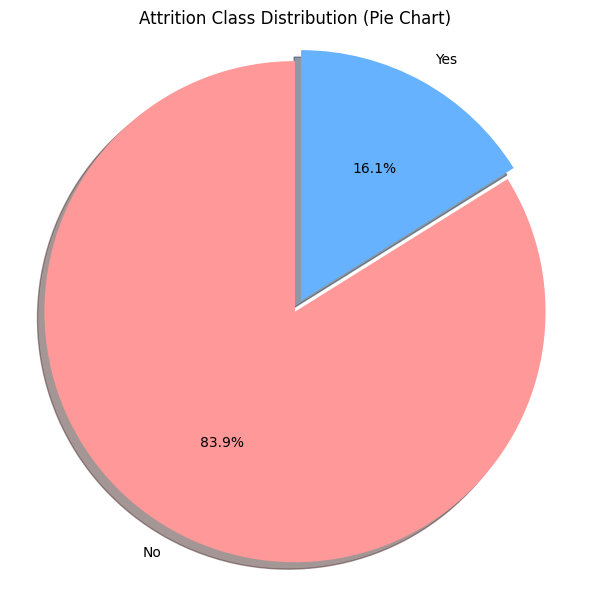

In [42]:
# Count and percentage for class labels
class_counts = df['Attrition'].value_counts()
labels = class_counts.index
sizes = class_counts.values
colors = ['#FF9999', '#66B2FF']  # pastel red and blue
explode = (0.05, 0)  # Slight explode for first slice (usually "No")

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        explode=explode,
        shadow=True)
plt.title('Attrition Class Distribution (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures a circle
plt.tight_layout()
plt.show()

The dataset has a clear class imbalance, with only ~16% of employees labeled as having left the organization. We will address this during the modeling phase using techniques such as SMOTE (Synthetic Minority Oversampling Technique), especially for models like logistic regression or neural networks.

Step 3: Missing Values & Descriptive Stats

In [30]:
# 1. Total missing values per column
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)

print("Columns with Missing Values:\n")
print(missing_summary)

Columns with Missing Values:

Series([], dtype: int64)


Data is clean: No missing values, no invalid categories, and constant columns have been removed.

In [31]:
# 2. Descriptive statistics for numerical columns
desc_stats = df.describe().T

# 3. Add skewness and missing count to the stats
desc_stats['missing'] = df.isnull().sum()
desc_stats['skewness'] = df.skew(numeric_only=True)

print("\nDescriptive Statistics with Missing and Skewness:\n")
desc_stats = desc_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'missing', 'skewness']]
desc_stats.round(2)


Descriptive Statistics with Missing and Skewness:



,count,mean,std,min,25%,50%,75%,max,missing,skewness
Age,1470.0,36.92,9.14,18.00,30.00,36.00,43.00,60.0,0,0.41
DistanceFromHome,1470.0,9.19,8.11,1.00,2.00,7.00,14.00,29.0,0,0.96
Education,1470.0,2.91,1.02,1.00,2.00,3.00,4.00,5.0,0,-0.29
EnvironmentSatisfaction,1470.0,2.72,1.09,1.00,2.00,3.00,4.00,4.0,0,-0.32
JobInvolvement,1470.0,2.73,0.71,1.00,2.00,3.00,3.00,4.0,0,-0.50
JobSatisfaction,1470.0,2.73,1.10,1.00,2.00,3.00,4.00,4.0,0,-0.33
MonthlyIncome,1470.0,6502.93,4707.96,1009.00,2911.00,4919.00,8379.00,19999.0,0,1.37
NumCompaniesWorked,1470.0,2.69,2.50,0.00,1.00,2.00,4.00,9.0,0,1.03
PercentSalaryHike,1470.0,15.21,3.66,11.00,12.00,14.00,18.00,25.0,0,0.82
RelationshipSatisfaction,1470.0,2.71,1.08,1.00,2.00,3.00,4.00,4.0,0,-0.30


No missing values were found across all columns — confirming the dataset is clean and ready for modeling.

Skewness was used to assess the symmetry of distributions for numeric features.

Step 4: Outlier Detection

In [32]:
def count_outliers_tukey(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return ((series < lower) | (series > upper)).sum()

# Choose relevant numeric columns to inspect
columns_to_check = ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany',
                    'Compa Ratio', 'JobHoppingIndex', 'RoleTenureRatio']

# Calculate outlier count for each using Tukey's method
outlier_counts = {col: count_outliers_tukey(df[col]) for col in columns_to_check}
outlier_counts


{'MonthlyIncome': np.int64(114),
 'TotalWorkingYears': np.int64(63),
 'YearsAtCompany': np.int64(104),
 'Compa Ratio': np.int64(18),
 'JobHoppingIndex': np.int64(157),
 'RoleTenureRatio': np.int64(0)}

Not all numeric variables are suitable for outlier detection. We specifically selected:

Continuous features with wide or unbounded ranges based on skewness statistic

Features where skewness or outliers could reflect business behaviors (e.g., tenure, compensation disparity)

Excluded ordinal (1–5) or discrete count features where the concept of an "outlier" does not apply (e.g., JobSatisfaction, Education, StockOptionLevel)

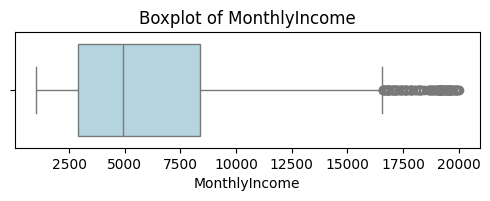

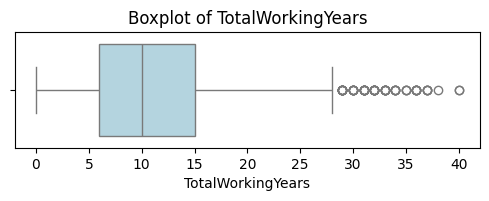

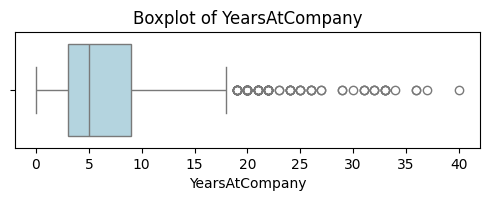

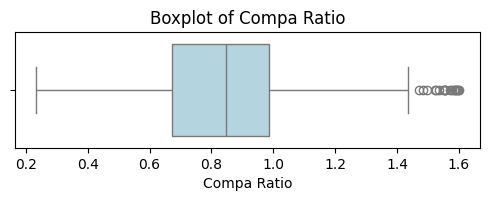

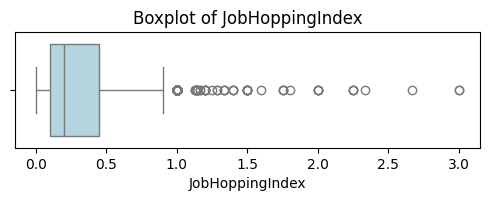

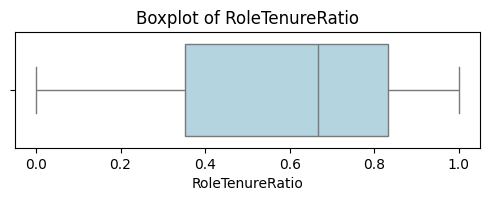

In [38]:
# Plot individual boxplots
for col in columns_to_check:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


Outliers in these features are not treated as errors — they reflect real-world HR conditions (e.g., long tenure, high job-hopping) and may be predictive of attrition.

Step 5: Correlation Analysis

In [28]:
# Select only numeric features for correlation analysis
numeric_df = df.select_dtypes(include=['int64', 'float64'])

In [29]:
# Compute the correlation matrix
correlation_matrix = numeric_df.corr()


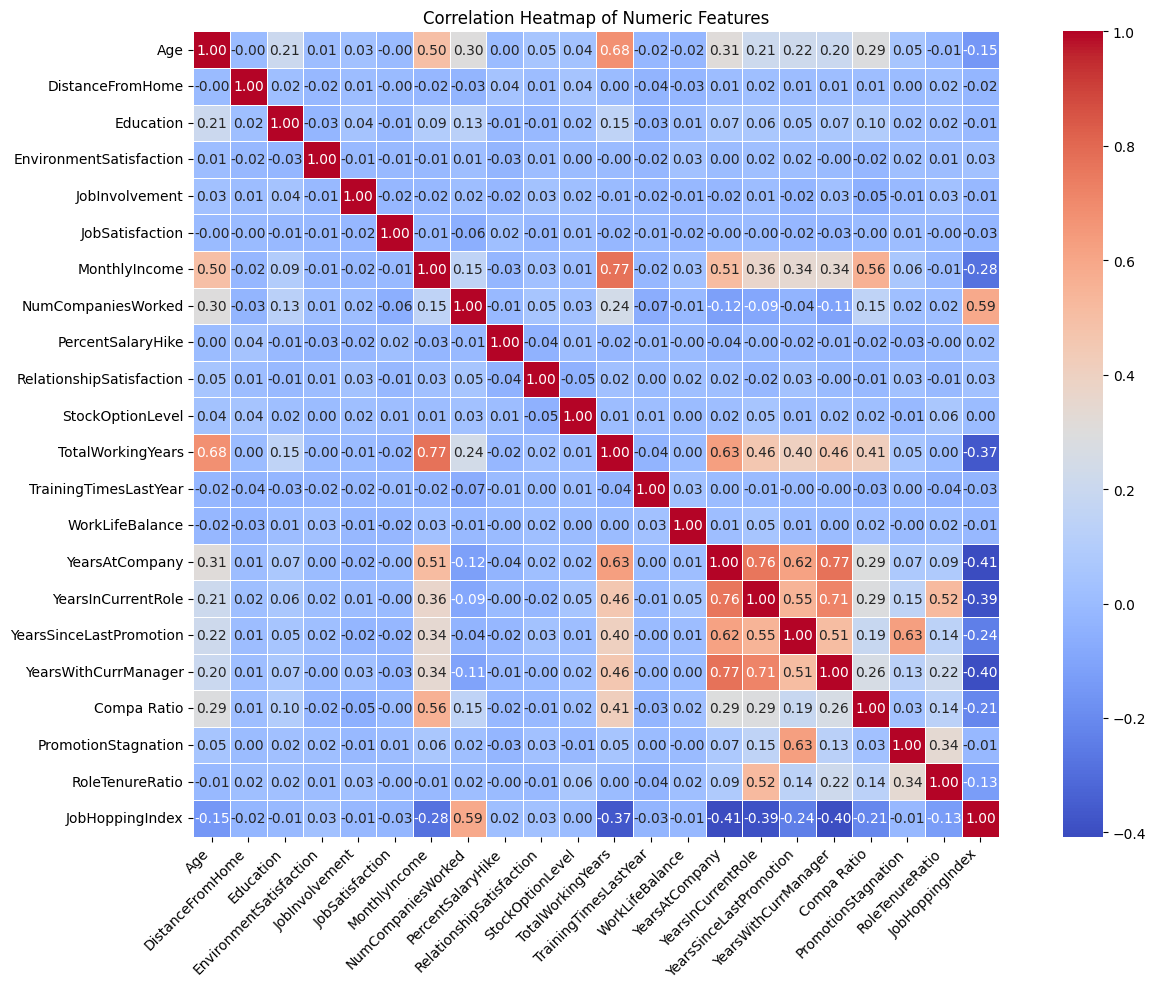

In [30]:
# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [31]:
# Calculate correlation matrix
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr().abs()

# Unstack the correlation matrix and reset index
high_corr_pairs = (
    corr_matrix.unstack()
    .reset_index()
    .rename(columns={'level_0': 'Feature1', 'level_1': 'Feature2', 0: 'Correlation'})
)

# Remove self-correlations and duplicate pairs
high_corr_pairs = high_corr_pairs[high_corr_pairs['Feature1'] != high_corr_pairs['Feature2']]
high_corr_pairs['Sorted'] = high_corr_pairs.apply(lambda row: tuple(sorted([row['Feature1'], row['Feature2']])), axis=1)
high_corr_pairs = high_corr_pairs.drop_duplicates(subset='Sorted').drop(columns='Sorted')

# Filter for high correlation pairs (greater than 0.7)
strong_corr = high_corr_pairs[high_corr_pairs['Correlation'] > 0.7]

# Sort by descending correlation
strong_corr = strong_corr.sort_values(by='Correlation', ascending=False)

print("Highly correlated pairs (>|0.7|):")
print(strong_corr)


Highly correlated pairs (>|0.7|):
               Feature1              Feature2  Correlation
143       MonthlyIncome     TotalWorkingYears     0.772893
325      YearsAtCompany  YearsWithCurrManager     0.769212
323      YearsAtCompany    YearsInCurrentRole     0.758754
347  YearsInCurrentRole  YearsWithCurrManager     0.714365


Identified highy correlated pairs, removal of which one from data set will be made based on its respective correlation with target variable which will be identifed through biserial correlation.

In [32]:
from scipy.stats import pointbiserialr

# Convert Attrition to binary: Yes = 1, No = 0
df['Attrition_binary'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# List of numeric features to check
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.drop('Attrition_binary')

# Calculate point biserial correlation
pb_results = {
    feature: pointbiserialr(df['Attrition_binary'], df[feature])[0]
    for feature in numeric_features
}

# Create sorted DataFrame
pb_df = pd.DataFrame(pb_results.items(), columns=['Feature', 'PointBiserialCorr']).sort_values(
    by='PointBiserialCorr', key=abs, ascending=False)

print(pb_df)


                     Feature  PointBiserialCorr
21           JobHoppingIndex           0.225917
11         TotalWorkingYears          -0.171063
15        YearsInCurrentRole          -0.160545
6              MonthlyIncome          -0.159840
0                        Age          -0.159205
17      YearsWithCurrManager          -0.156199
18               Compa Ratio          -0.153154
10          StockOptionLevel          -0.137145
14            YearsAtCompany          -0.134392
20           RoleTenureRatio          -0.130324
4             JobInvolvement          -0.130016
5            JobSatisfaction          -0.103481
3    EnvironmentSatisfaction          -0.103369
1           DistanceFromHome           0.077924
13           WorkLifeBalance          -0.063939
12     TrainingTimesLastYear          -0.059478
9   RelationshipSatisfaction          -0.045872
7         NumCompaniesWorked           0.043494
16   YearsSinceLastPromotion          -0.033019
19       PromotionStagnation           0

In [33]:
# Drop features with comments explaining why each was removed

columns_to_drop_with_reasons = {
    'MonthlyIncome': "Highly correlated with TotalWorkingYears (r=0.77) and lower point biserial correlation with Attrition.",
    'YearsAtCompany': "Highly correlated with both YearsWithCurrManager and YearsInCurrentRole; has the weakest correlation with Attrition among the three.",
    'YearsWithCurrManager': "Highly correlated with YearsInCurrentRole (r=0.71) and slightly lower point biserial correlation with Attrition."
}

# Print reasons before dropping
print("Dropping the following columns with reasons:")
for col, reason in columns_to_drop_with_reasons.items():
    print(f"- {col}: {reason}")

# Drop the columns
df = df.drop(columns=columns_to_drop_with_reasons.keys())

# Show updated column count
print(f"\nRemaining columns: {df.shape[1]}")
df.columns.tolist()


Dropping the following columns with reasons:
- MonthlyIncome: Highly correlated with TotalWorkingYears (r=0.77) and lower point biserial correlation with Attrition.
- YearsAtCompany: Highly correlated with both YearsWithCurrManager and YearsInCurrentRole; has the weakest correlation with Attrition among the three.
- YearsWithCurrManager: Highly correlated with YearsInCurrentRole (r=0.71) and slightly lower point biserial correlation with Attrition.

Remaining columns: 30


['Age',
 'Attrition',
 'BusinessTravel',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'JobRoleLevel',
 'Compa Ratio',
 'PromotionStagnation',
 'RoleTenureRatio',
 'JobHoppingIndex',
 'PromotionFlag',
 'Attrition_binary']

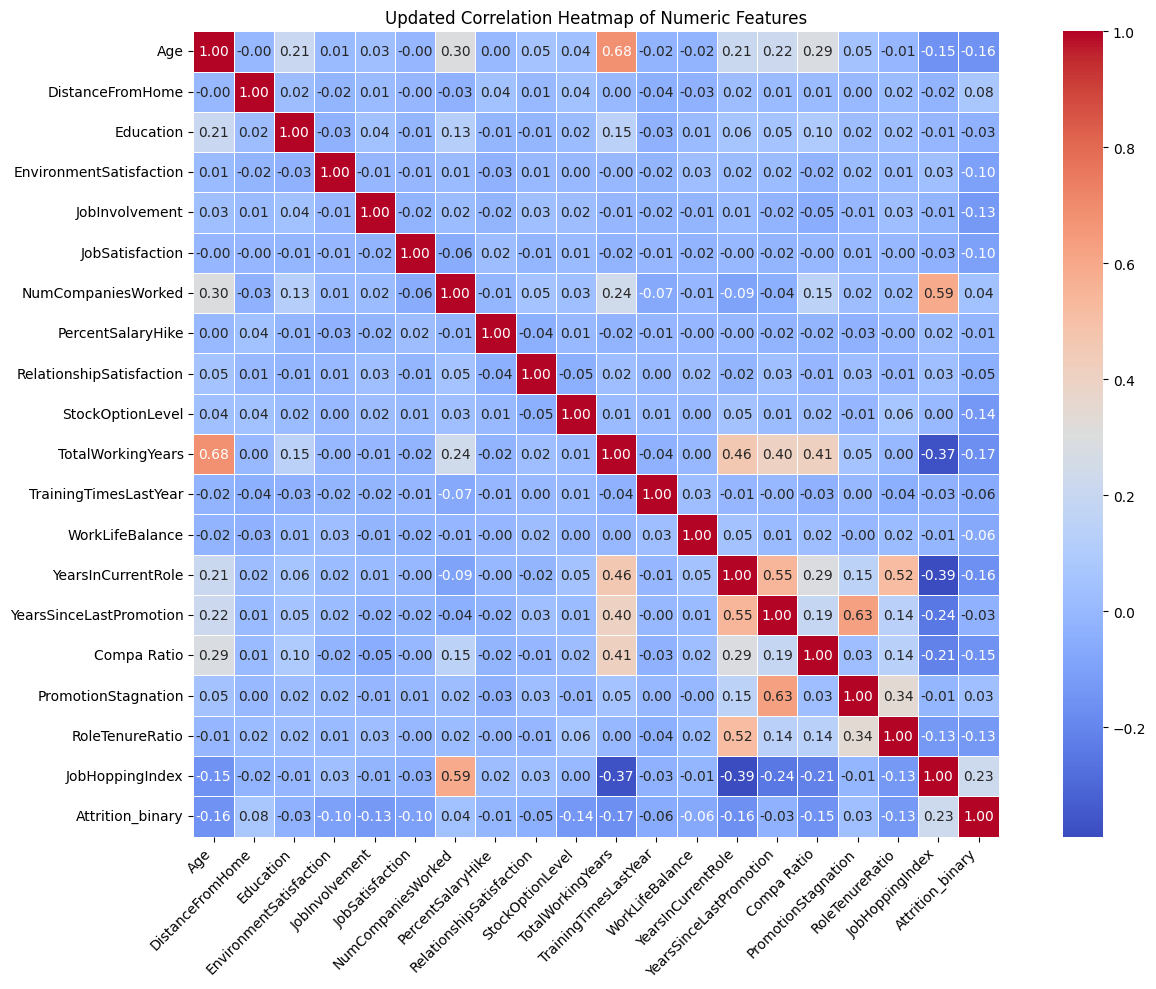

In [34]:
# Select numeric columns for correlation check
numeric_df_updated = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix_updated = numeric_df_updated.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_updated, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Updated Correlation Heatmap of Numeric Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Confirmation that Multicollinearity doesnt exist in the data set.

Step 6: Chi Square Analysis

In [35]:
from scipy.stats import chi2_contingency

In [36]:
# Convert Attrition to binary if not already done
df['Attrition_binary'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'Attrition']

# Run Chi-square test between each categorical feature and Attrition
chi2_results = []

for col in categorical_cols:
    contingency = pd.crosstab(df[col], df['Attrition'])
    try:
        chi2, p, dof, ex = chi2_contingency(contingency)
        chi2_results.append((col, p))
    except ValueError:
        chi2_results.append((col, None))  # In case of error

# Create and display results
chi2_df = pd.DataFrame(chi2_results, columns=['Feature', 'p_value'])
chi2_df['Significant'] = chi2_df['p_value'] < 0.05
chi2_df = chi2_df.sort_values(by='p_value')

In [37]:
# Show in notebook
print("Chi-Square Test Results (vs Attrition):\n")
print(chi2_df)

Chi-Square Test Results (vs Attrition):

          Feature       p_value  Significant
6        OverTime  8.158424e-21         True
7    JobRoleLevel  2.322721e-15         True
4         JobRole  2.752482e-15         True
5   MaritalStatus  9.455511e-11         True
0  BusinessTravel  5.608614e-06         True
8   PromotionFlag  2.046011e-05         True
1      Department  4.525607e-03         True
2  EducationField  6.773980e-03         True
3          Gender  2.905724e-01        False


In [140]:
# Drop redundant and non-significant categorical columns
columns_to_drop_categorical = [
    'Gender',    # Not significantly associated with Attrition
    'JobRole'    # Redundant with JobRoleLevel
]
df.drop(columns=columns_to_drop_categorical, inplace=True)

Correlation and Chi-Square tests help remove variables which are either highly collinear with others (leading to multicollinearity) or statistically unrelated to the target variable. By eliminating such variables, we reduce noise, improve model stability, and enhance interpretability

Step 7: Encoding

In [141]:
# List of categorical variables to one-hot encode
categorical_to_encode = [
    'BusinessTravel',
    'Department',
    'EducationField',
    'MaritalStatus',
    'OverTime',
    'PromotionFlag',
    'JobRoleLevel'
]

# One-hot encode these features
df_encoded = pd.get_dummies(df, columns=categorical_to_encode, drop_first=True)

# Show updated column count and names
df_encoded.shape, df_encoded.columns.tolist()

((1470, 59),
 ['Age',
  'Attrition',
  'DistanceFromHome',
  'Education',
  'EnvironmentSatisfaction',
  'JobInvolvement',
  'JobSatisfaction',
  'NumCompaniesWorked',
  'PercentSalaryHike',
  'RelationshipSatisfaction',
  'StockOptionLevel',
  'TotalWorkingYears',
  'TrainingTimesLastYear',
  'WorkLifeBalance',
  'YearsInCurrentRole',
  'YearsSinceLastPromotion',
  'Compa Ratio',
  'PromotionStagnation',
  'RoleTenureRatio',
  'JobHoppingIndex',
  'Attrition_binary',
  'BusinessTravel_Travel_Frequently',
  'BusinessTravel_Travel_Rarely',
  'Department_Research & Development',
  'Department_Sales',
  'EducationField_Life Sciences',
  'EducationField_Marketing',
  'EducationField_Medical',
  'EducationField_Other',
  'EducationField_Technical Degree',
  'MaritalStatus_Married',
  'MaritalStatus_Single',
  'OverTime_Yes',
  'PromotionFlag_No Promotion',
  'JobRoleLevel_Healthcare Representative 3',
  'JobRoleLevel_Healthcare Representative 4',
  'JobRoleLevel_Human Resources 1',
  'JobRo